In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankbalanced/bank.csv


Importing Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


%matplotlib inline

In [3]:
data=pd.read_csv('/kaggle/input/bankbalanced/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# EDA (categorical)- to check if any column is skewed or not providing any inference

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

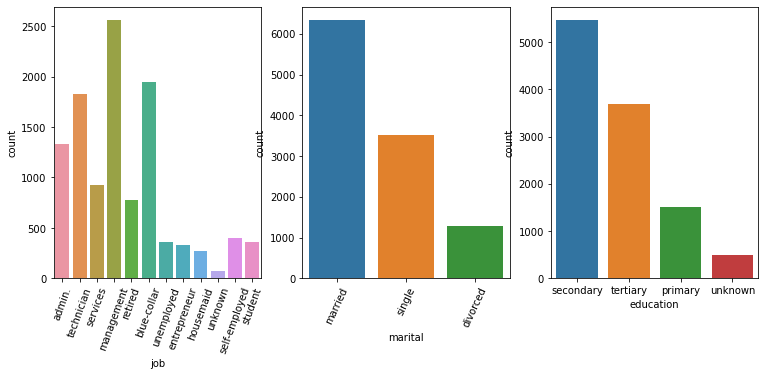

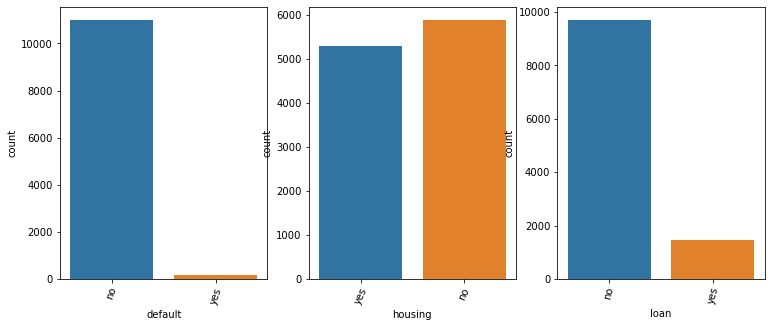

In [5]:
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.countplot(x='job',data=data)
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(x='marital',data=data)
plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.countplot(x='education',data=data)
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.countplot(x='default',data=data)
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(x='housing',data=data)
plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.countplot(x='loan',data=data)
plt.xticks(rotation=75)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

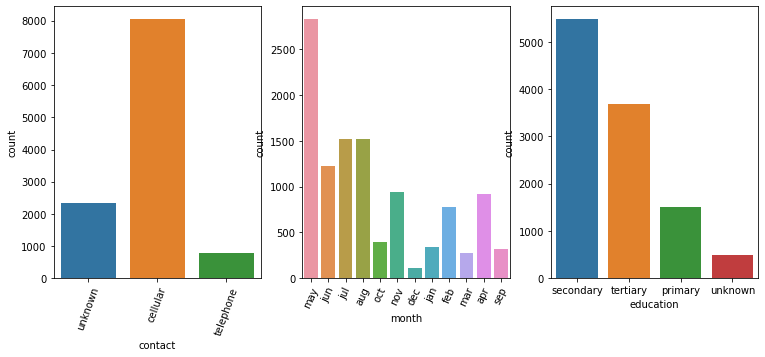

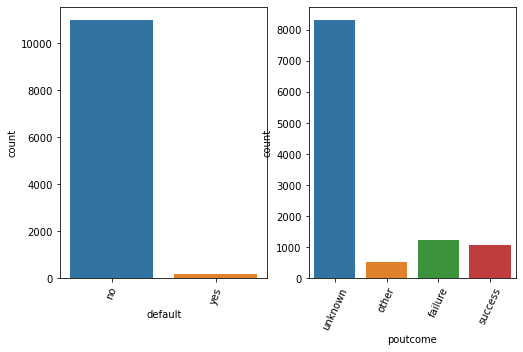

In [6]:
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.countplot(x='contact',data=data)
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(x='month',data=data)
plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.countplot(x='education',data=data)
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.countplot(x='default',data=data)
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(x='poutcome',data=data)
plt.xticks(rotation=65)

# Treating Outliers

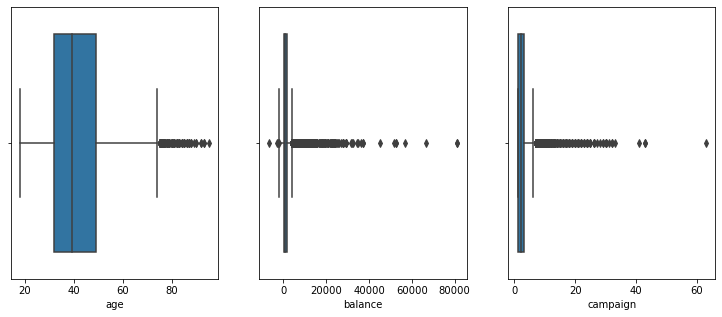

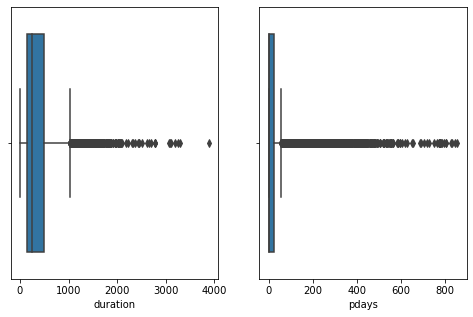

In [7]:


plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.boxplot(data['age'])
plt.subplot(1,6,2)
sns.boxplot(data['balance'])
plt.subplot(1,6,3)
sns.boxplot(data['campaign'])
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.boxplot(data['duration'])

plt.subplot(1,6,2)
sns.boxplot(data['pdays'])


In [8]:
q1 = data['balance'].quantile(0.05)
q4 = data['balance'].quantile(0.95)
data= data[(data['balance']>=q1) & (data['balance']<=q4)]
data.shape

(10044, 17)

In [9]:
q1 = data['duration'].quantile(0.05)
q4 = data['duration'].quantile(0.95)
data2 = data[(data['duration']>=q1) & (data['duration']<=q4)]
data2.shape

(9048, 17)

In [10]:
q1 = data['campaign'].quantile(0.05)
q4 = data['campaign'].quantile(0.95)
data = data[(data['campaign']>=q1) & (data['campaign']<=q4)]
data.shape

(9641, 17)

In [11]:
q1 = data['age'].quantile(0.02)
q4 = data['age'].quantile(0.98)
data = data[(data['age']>=q1) & (data['age']<=q4)]
data.shape

(9271, 17)

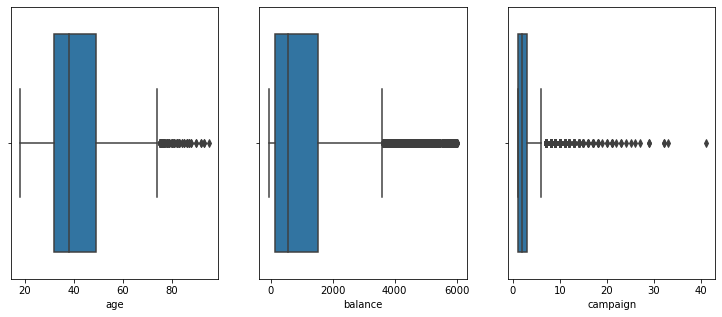

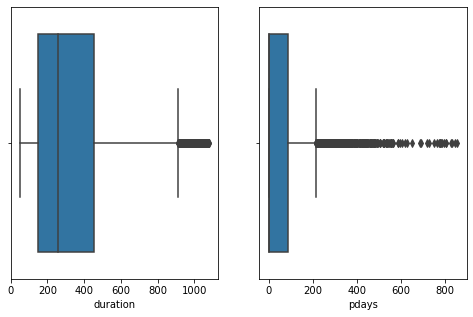

In [12]:
#checking for outliers 

plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.boxplot(data2['age'])
plt.subplot(1,6,2)
sns.boxplot(data2['balance'])
plt.subplot(1,6,3)
sns.boxplot(data2['campaign'])
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.boxplot(data2['duration'])

plt.subplot(1,6,2)
sns.boxplot(data2['pdays'])


In [13]:
data.drop(['default'],axis=1,inplace=True) #skewed


# Binary Classification

In [14]:
varlist=['housing','loan','deposit']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the df list
data[varlist] = data[varlist].apply(binary_map)

# Dummy

In [15]:
cat_df=data[['job','marital','education','contact','month','poutcome']]
cat_df.head()

,job,marital,education,contact,month,poutcome
0,admin.,married,secondary,unknown,may,unknown
1,admin.,married,secondary,unknown,may,unknown
2,technician,married,secondary,unknown,may,unknown
3,services,married,secondary,unknown,may,unknown
4,admin.,married,tertiary,unknown,may,unknown


In [16]:
data_dummies=pd.get_dummies(cat_df,drop_first=True)
data_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [17]:
data.drop(list(cat_df.columns),axis=1,inplace=True)

In [18]:
data=pd.concat([data,data_dummies],axis=1)

In [19]:
data.head()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1,0,5,1042,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,56,45,0,0,5,1467,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,41,1270,1,0,5,1389,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,55,2476,1,0,5,579,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,54,184,0,0,5,673,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# Modelling


In [20]:
X=data.drop(['deposit'],axis=1)
y=data.deposit

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [22]:
#scaling the train and test data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
#class imbalance
100*y_train.value_counts(normalize=True)

0    51.995685
1    48.004315
Name: deposit, dtype: float64

# Random Forest

In [25]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_model=RandomForestClassifier(class_weight='balanced',criterion='gini',min_samples_leaf=1,min_samples_split=16,n_estimators=700)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print('Accuracy :  {}'.format(metrics.accuracy_score(y_test,y_pred)))
print('Sensitivity :  {}'.format(metrics.recall_score(y_test,y_pred)))

Accuracy :  0.8400431344356578
Sensitivity :  0.8881278538812786
